In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import matplotlib as mpl

plt.style.use('../declutter.mplstyle')
azulespacio = '#000080'
gris = 'gray'

In [ ]:
f = "../../data/debris/yearly-number-of-objects-launched-into-outer-space.csv"

data  = pd.read_csv(f)
world = data[data['Entity']=="World"]
world.set_index("Year",inplace=True)
world


,Entity,Code,Yearly number of objects launched into outer space
Year,,,
1957,World,OWID_WRL,2
1958,World,OWID_WRL,8
1959,World,OWID_WRL,14
1960,World,OWID_WRL,20
1961,World,OWID_WRL,38
...,...,...,...
2018,World,OWID_WRL,454
2019,World,OWID_WRL,586
2020,World,OWID_WRL,1274


Text(0, 0.5, 'Lanzamientos al espacio')

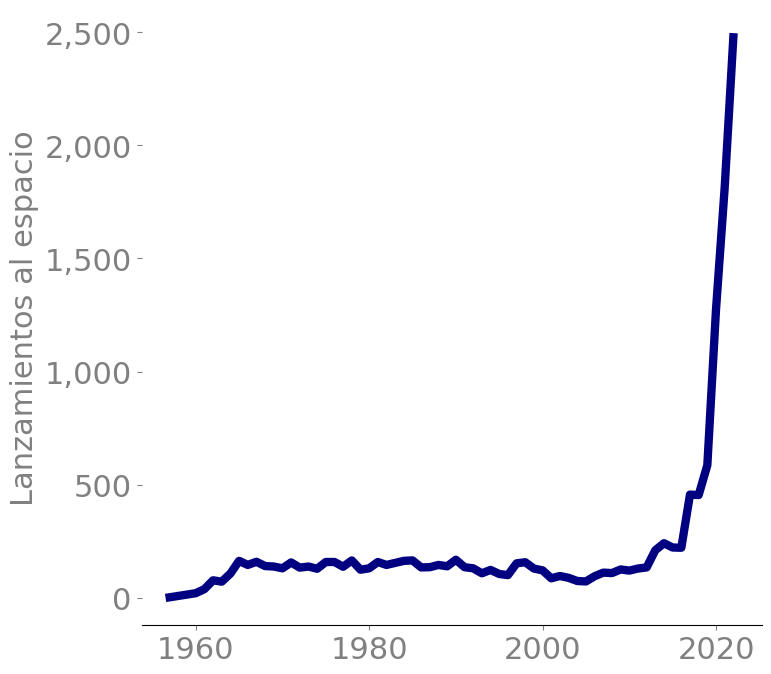

In [ ]:
var = 'Yearly number of objects launched into outer space'
fig, ax  = plt.subplots(figsize=(8,8))


ax.plot(world[var],color=azulespacio)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel("Lanzamientos al espacio")

In [ ]:
data.columns

Index(['Entity', 'Code', 'Year',
       'Yearly number of objects launched into outer space'],
      dtype='object')

In [ ]:
data["Entity"].unique()

array(['Algeria', 'Angola', 'Arabsat', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus',
       'Belgium', 'Bhutan', 'Bolivia', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Czechia', 'Denmark',
       'EUMETSAT', 'Ecuador', 'Egypt', 'Estonia', 'Ethiopia',
       'European Space Agency', 'European Union', 'Eutelsat', 'Finland',
       'France', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hungary',
       'India', 'Indonesia', 'Inmarsat', 'Intelsat', 'Intersputnik',
       'Iran', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kazakhstan',
       'Kenya', 'Laos', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia',
       'Mauritius', 'Mexico', 'Moldova', 'Monaco', 'Mongolia', 'Morocco',
       'NATO', 'Nepal', 'Netherlands', 'New Zealand', 'Nigeria',
       'North Korea', 'Norway', 'Pakistan', 'Papua New Guinea',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar',
       'RASCOM', 'Romania', 'Rus

In [ ]:
paises = data[["Entity",var]].groupby(by = ["Entity"]).sum()
paises = paises.sort_values(by=var,ascending=False).iloc[1:11]
paises = paises.iloc[::-1]
paises

,Yearly number of objects launched into outer space
Entity,
Canada,91
European Space Agency,102
Germany,118
India,138
France,141
Japan,314
United Kingdom,622
China,923
Russia,3661


In [ ]:
paises

,Yearly number of objects launched into outer space
Entity,
Canada,91
European Space Agency,102
Germany,118
India,138
France,141
Japan,314
United Kingdom,622
China,923
Russia,3661


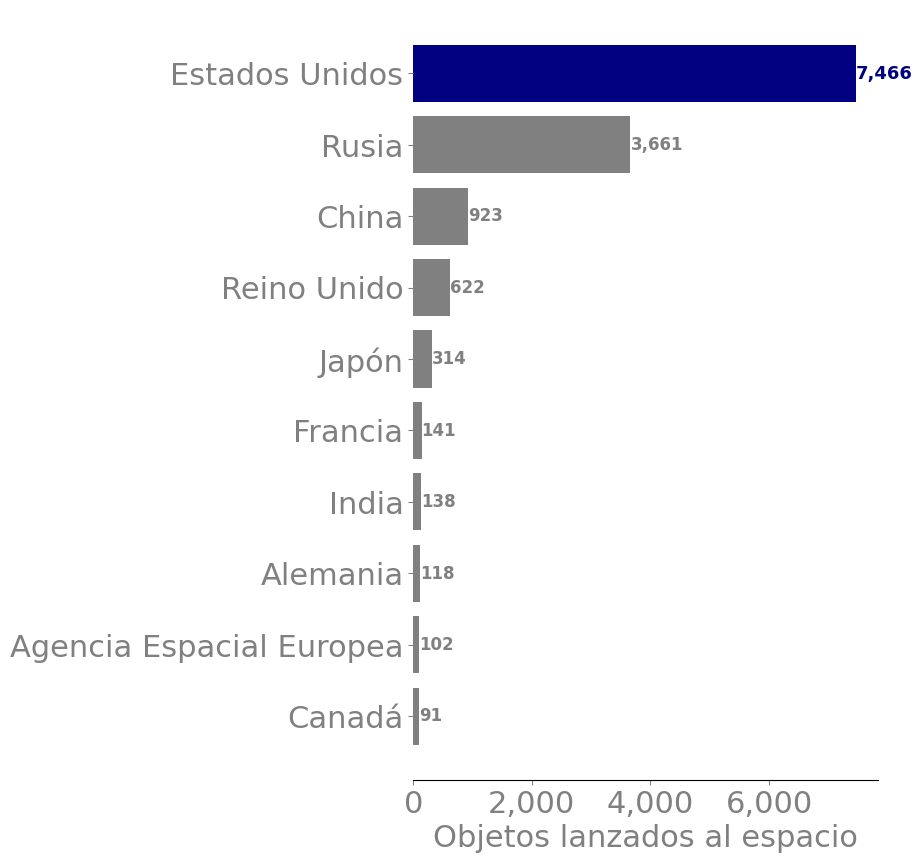

In [ ]:
fig, ax = plt.subplots(figsize=(6,10))


diccionario_paises = {
    'Canada': 'Canadá',
    'European Space Agency': 'Agencia Espacial Europea',
    'Germany': 'Alemania',
    'India': 'India',
    'France': 'Francia',
    'Japan': 'Japón',
    'United Kingdom': 'Reino Unido',
    'China': 'China',
    'Russia': 'Rusia',
    'United States': 'Estados Unidos'
}

# Aplicar el diccionario al índice del DataFrame (renombra los índices)
paises.rename(index=diccionario_paises, inplace=True)


colors = [gris] * (len(paises.index) - 1) + [azulespacio]

bars = ax.barh(paises.index, 
         paises['Yearly number of objects launched into outer space'], 
         color=[gris,gris,gris,gris,gris,gris,gris,gris,gris,azulespacio])
ax.set_xlabel('Objetos lanzados al espacio')

ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

etiqueta_color = azulespacio

# Colocar la leyenda fuera de cada barra.
for i, bar in enumerate(bars):
    # Cambiar el color de la etiqueta para el primer elemento
    if i < len(bars) - 1:
        etiqueta_color = gris
        tamanio = 12
    else:
        etiqueta_color = azulespacio
        tamanio = 13
    
    ax.text(bar.get_width() + 1,  # x-coordinate position just outside of the bar
            bar.get_y() + bar.get_height() / 2,  # y-coordinate position
            f"{bar.get_width():,.0f}",  # text to show on bar (formatted)
            va='center',  # center alignment vertically
            ha='left',    # left alignment horizontally, since we are outside the bar
            color=etiqueta_color,  # text color
            fontweight='bold',     # font weight
            fontsize=tamanio,           # font size
            )



In [ ]:
f = "../../data/debris/low-earth-orbits-objects.csv"
low = pd.read_csv(f,usecols=[0,2,3])
low.Entity.unique()

array(['Debris', 'Geostationary orbit', 'High Earth orbit',
       'Low Earth orbit', 'Medium Earth orbit', 'Payloads',
       'Rocket bodies'], dtype=object)

In [ ]:

# Define the data as provided by the user
data = {
    "Orbital Regime": ["LEO", "GEO", "EGO", "GTO", "NSO", "MEO \n+\n Other", "LMO", "MGO", "HEO"],
#     "PL": [8667, 785, 519, 53, 279, 75, 83, 66, 27, 44, 10598],
#     "PF": [5988, 4, 0, 27, 0, 0, 140, 65, 14, 0, 6238],
#     "PD": [107, 3, 1, 1, 0, 4, 5, 1, 0, 0, 122],
#     "PM": [227, 9, 48, 11, 1, 49, 46, 2, 1, 5, 399],
#     "RB": [955, 65, 199, 229, 95, 24, 244, 175, 53, 4, 2043],
#     "RF": [2986, 0, 87, 201, 0, 66, 587, 2131, 110, 0, 6168],
#     "RD": [33, 0, 3, 12, 0, 1, 21, 4, 0, 0, 74],
#     "RM": [584, 0, 2, 52, 2, 4, 212, 0, 0, 0, 856],
#     "UI": [2113, 48, 1911, 724, 35, 425, 1031, 1260, 1124, 94, 8765],
    "numero": [21660, 914, 2770, 1310, 559, 648, 2369, 3704, 1329]
}

# Convert the dictionary to a DataFrame
debris = pd.DataFrame(data)

# Re-index the DataFrame with the 'Orbital Regime' column
# debris.set_index('Orbital Regime', inplace=True)
debris
debris["porcentaje"] = debris.numero/debris.numero.sum() * 100
debris

,Orbital Regime,numero,porcentaje
0,LEO,21660,61.424156
1,GEO,914,2.591952
2,EGO,2770,7.855259
3,GTO,1310,3.714942
4,NSO,559,1.585231
5,MEO \n+\n Other,648,1.837620
6,LMO,2369,6.718090
7,MGO,3704,10.503928
8,HEO,1329,3.768823


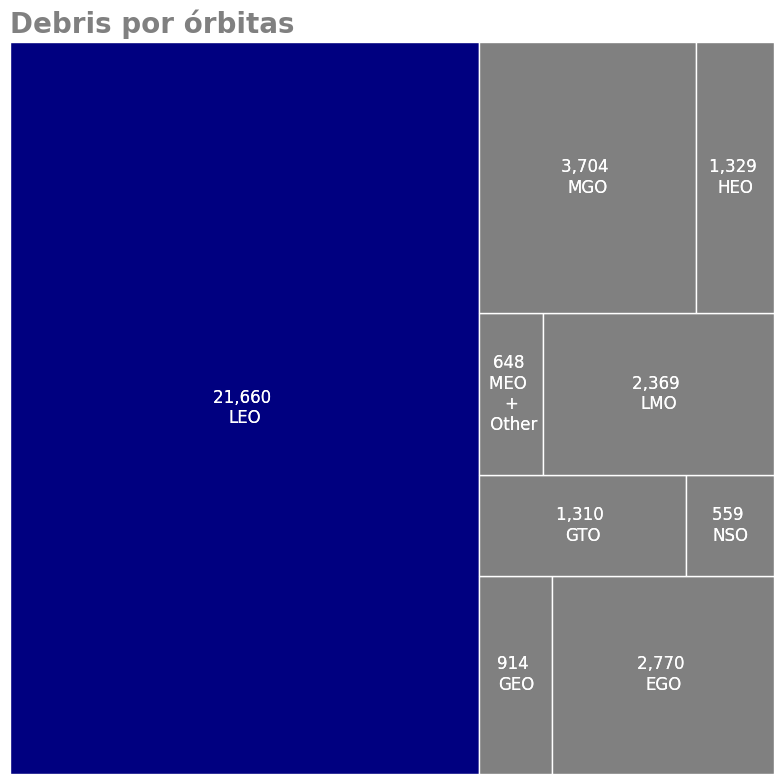

In [ ]:

#compute data for plotting
sizes = debris['numero']
label = debris["Orbital Regime"]


#                   df['staff_number'].sum()) * 100
list = debris['numero']
new_list = [f'{i:,.0f} \n' for i in list]

#plot the chart
fig, ax = plt.subplots(figsize=(8,8))
treemap = squarify.plot(sizes=sizes, 
                        label=new_list+label, 
                        color='grey', 
                        ec='#ffffff', 
                        text_kwargs={"color":"#ffffff"})
treemap = squarify.plot(sizes=sizes, 
                        label=new_list+label, 
                        color=[azulespacio,"gray","gray","gray","gray","gray","gray","gray","gray","gray"], 
                        ec='#ffffff', 
                        text_kwargs={"color":"#ffffff"})
noax = plt.axis('off')
ax.set_title(
    'Debris por órbitas ', 
    fontsize=20, 
    weight='bold',
    loc="left")

#adjust chart margin and layout
fig.tight_layout()

